In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import key_INEGI
from datetime import date
output_data_file = "output_data/rate_nal_desempleo.csv"
#code downloaded from stack overflow to iterate through dates as INEGI json national output is ("TIME PERIOD")
from datetime import timedelta, date
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [41]:
#URL test to see how json response is for posterior coding; boolean indicator is turned to "false" to get the entire historical series
url =(f"https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/444666/es/00000/false/BIE/2.0/{key_INEGI}?type=json")
response_nal = requests.get(url).json()
#un-hashtag to see actual json structure response
#response_nal

In [15]:
#Determine the actual length of obesrvations from json response; in this case the data periods available
counter=len(response_nal["Series"][0]["OBSERVATIONS"])
counter

173

In [21]:
period=[]
national_rate=[]
#manual input of date matching the avaliable data from CNBV
start_date = date(2018, 6, 1)
end_date = date(2019, 5, 30)
for i in range(counter):
    period.append(response["Series"][0]["OBSERVATIONS"][i]['TIME_PERIOD'])
    national_rate.append(response["Series"][0]["OBSERVATIONS"][i]['OBS_VALUE'])
#Creating dataframe of API's data
national_dict = {"Mes":period,
    "Tasa Nal Desempleo":national_rate}
national_df = pd.DataFrame(national_dict)
national_df.head()
req_data = national_df.loc[national_df["Mes"]>"2018/05",:]

In [33]:
req_data.head()

,Mes,Tasa Nal Desempleo
161,2018/06,3.38527594
162,2018/07,3.47763888
163,2018/08,3.46852407
164,2018/09,3.60037254
165,2018/10,3.23839404


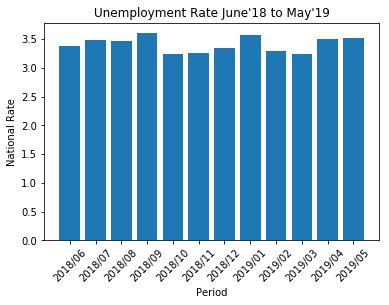

<Figure size 432x288 with 0 Axes>

In [40]:
plt.bar(req_data["Mes"],req_data["Tasa Nal Desempleo"].astype("float"))
#Plot labeling, title, legend location, etc
plt.xticks(rotation=45)
plt.title("Unemployment Rate June'18 to May'19")
plt.xlabel("Period")
plt.ylabel("National Rate")
plt.show()
plt.savefig("ratevsDaysNAL.jpg")